In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('datasets/DataAnalyst.csv', index_col=0)

In [8]:
df.tail()   

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1
2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1
2252,Senior Quality Data Analyst,$78K-$104K (Glassdoor est.),"You.\n\nYou bring your body, mind, heart and s...",3.4,SCL Health\n3.4,"Broomfield, CO","Broomfield, CO",10000+ employees,1864,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Centura Health, HealthONE, Denver Health and H...",-1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2253 non-null   object 
 7   Size               2253 non-null   object 
 8   Founded            2253 non-null   int64  
 9   Type of ownership  2253 non-null   object 
 10  Industry           2253 non-null   object 
 11  Sector             2253 non-null   object 
 12  Revenue            2253 non-null   object 
 13  Competitors        2253 non-null   object 
 14  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 281.6+ KB


In [11]:
len(df['Job Title'].unique())

1272

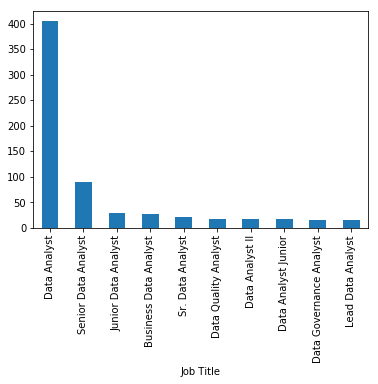

In [15]:
df.groupby('Job Title').count().sort_values('Location', ascending=False)[:10]['Location'].plot(kind='bar')

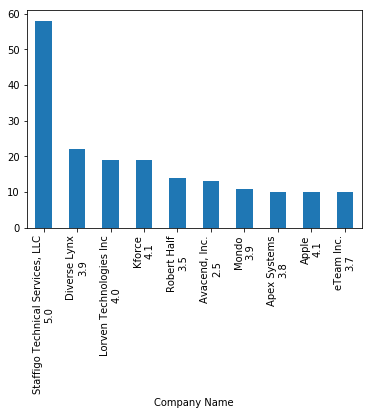

In [18]:
df.groupby('Company Name').count().sort_values('Location', ascending=False)[:10]['Location'].plot(kind='bar')

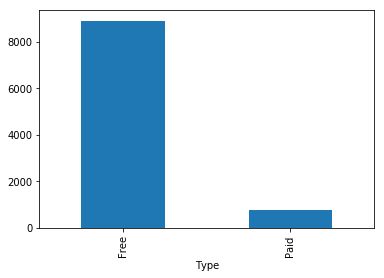

In [46]:
df_apps.groupby('Type').count()['App'].plot(kind="bar")